In [1]:
from scipy.io import arff
import pandas as pd
from GAN import GAN
from GAN_Twist import GAN_RF
from Dataset import Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import matplotlib.pyplot as plt


def plot_history_loss(history):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(history['D_loss'], label='Discriminator Loss')
    ax.plot(history['G_loss'], label='Generator Loss')
    ax.set_xlabel('Epoch')
    plt.legend()
    plt.show()

In [3]:
diabetes = Dataset('Assignment 4 files/diabetes.arff')
diabetes_df = diabetes.norm(method='MinMaxScaler')
diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


# Diabetes

In [4]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5001
learning_rate = 5e-4
models_dir = 'model_diabetes'

gan_args = [batch_size, learning_rate, noise_dim, diabetes_df.shape[1], dim]
train_args = ['', epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(diabetes_df, train_args)

0 [D loss: 0.675055, acc.: 48.44%] [G loss: 0.604308]
generated_data
100 [D loss: 0.634630, acc.: 53.12%] [G loss: 0.907941]
generated_data
200 [D loss: 0.679510, acc.: 60.94%] [G loss: 0.761864]
generated_data
300 [D loss: 0.702830, acc.: 48.44%] [G loss: 0.739566]
generated_data
400 [D loss: 0.679237, acc.: 60.94%] [G loss: 0.710482]
generated_data
500 [D loss: 0.691050, acc.: 50.00%] [G loss: 0.754058]
generated_data
600 [D loss: 0.667552, acc.: 57.81%] [G loss: 0.700583]
generated_data
700 [D loss: 0.700860, acc.: 50.00%] [G loss: 0.718819]
generated_data
800 [D loss: 0.694318, acc.: 50.00%] [G loss: 0.708844]
generated_data
900 [D loss: 0.690230, acc.: 53.12%] [G loss: 0.722580]
generated_data
1000 [D loss: 0.690581, acc.: 56.25%] [G loss: 0.686768]
generated_data
1100 [D loss: 0.689721, acc.: 59.38%] [G loss: 0.722183]
generated_data
1200 [D loss: 0.686555, acc.: 68.75%] [G loss: 0.700068]
generated_data
1300 [D loss: 0.695207, acc.: 53.12%] [G loss: 0.713137]
generated_data
1400

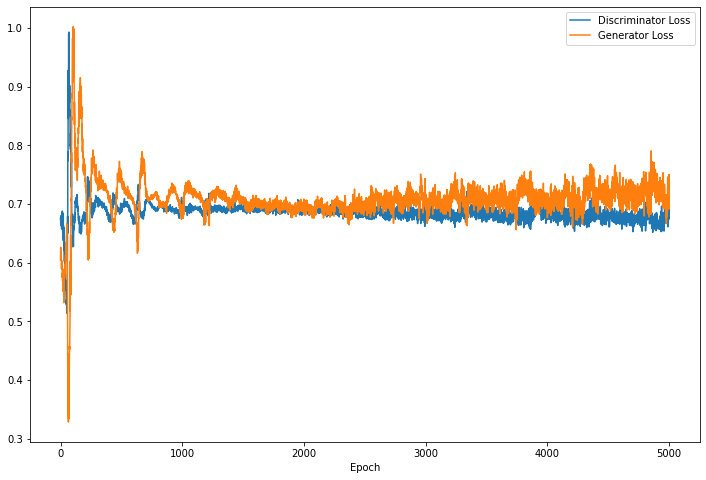

In [6]:
plot_history_loss(history)

In [7]:
X_embedded = diabetes.learn_embeddings()

In [8]:
X_embedded

array([[ 0.7069937 ,  0.15312978],
       [-0.40271091, -0.0881876 ],
       [ 0.68963127,  0.10496044],
       ...,
       [-0.34377156,  0.07261042],
       [ 0.62311372, -0.0179499 ],
       [-0.40738638, -0.17497506]])

In [31]:
import matplotlib.pyplot as plt
import numpy as np
def plot_gan_progress(data, df):
    # Setup parameters visualization parameters
    seed = 17
    test_size = 100 # number of fraud cases
    np.random.seed(seed)
    z = np.random.normal(size=(test_size, noise_dim))
    real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
    real_samples = pd.DataFrame(real)
    models = {'GAN': ['GAN', False, synthesizer.generator]}
    model_names = ['GAN']
    colors = ['deepskyblue','blue']
    markers = ['o','^']

    col1, col2 = 'CITY', 'ETHNICITY'

    base_dir = 'model/'

    #Actual fraud data visualization
    model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 4000, 5000]
    rows = len(model_steps)
    columns = 5

    axarr = [[]]*len(model_steps)



    fig, ax = plt.subplots(5, 2, figsize=(12, 16))


    for model_step_ix, model_step in enumerate(model_steps):      
        [model_name, with_class, generator_model] = models['GAN']
        generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
        g_z = generator_model.predict(z)
        g_z_emb = data.pca.transform(g_z)
        ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
        ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
        ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')
    return g_z

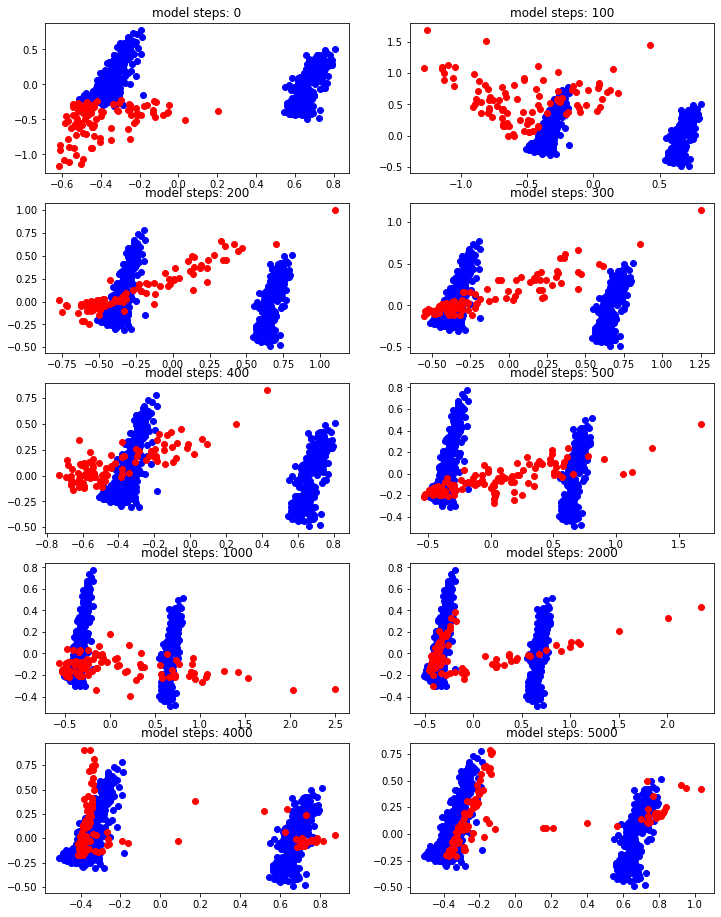

In [32]:
g_z = plot_gan_progress(diabetes, diabetes_df)

In [54]:
def plot_data_with_classes(data, df, g_z):
    fooled_samples = data.scaler.inverse_transform(g_z)
    generated_df = pd.DataFrame(fooled_samples)
    generated_df[8] = g_z[:,-1]
    generated_df.columns = data.df.columns
    generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
    generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
    generated_df = generated_df.round()
    generated_df[generated_df < 0] = 0
    class_col = generated_df['class']
    tmp = generated_df.drop(columns=['class' ,'discriminator'], axis=1)
    tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
    tmp = pd.concat([tmp, class_col],axis=1)
    original_emb = data.pca.transform(df)
    generated_positive_emb = data.pca.transform(tmp[tmp['class'].eq(1)])
    generated_negative_emb = data.pca.transform(tmp[tmp['class'].eq(0)])
    original_positive_emb = original_emb[df[df['class'].eq(1)].index.values]
    original_negative_emb = original_emb[df[df['class'].eq(0)].index.values]
    failed = data.pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title('Negative samples')
    ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
    ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')
    ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
    ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
    ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
    plt.legend()
    plt.show()

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


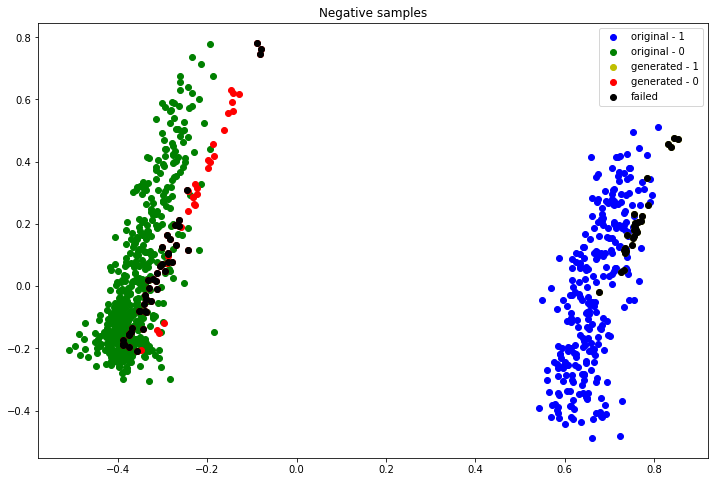

In [55]:
plot_data_with_classes(diabetes, diabetes_df, g_z)

In [64]:
import seaborn as sns, numpy as np

sns.set_theme(); np.random.seed(0)

def plot_feature_dist(df, gen):
    fig, ax = plt.subplots(int(np.ceil(df.shape[1]/2)), 2, figsize=(16, 30))
    for i in range(len(columns)):
        column = columns.values[i]
        ax[i // 2, i % 2].set_title(f'Feature distribution: {column}')
        sns.histplot(df[column], label='Original', stat='density', ax=ax[i // 2, i % 2], color='b')
        sns.histplot(gen[column], label='Generated', stat='density', ax=ax[i // 2, i % 2], color='r')
    fig.tight_layout()
    plt.savefig('diabetes.png')
plot_feature_dist(pd.DataFrame(diabetes.scaler.inverse_transform(diabetes.df.values), columns=columns), pd.DataFrame(diabetes.scaler.inverse_transform(g_z), columns=columns))

NameError: name 'columns' is not defined

In [117]:
scaler.inverse_transform(df.values[:, :-1])

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# German Credit

In [2]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
original_df = pd.DataFrame(data[0])
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [3]:
columns = original_df.columns

In [4]:
import re
for column in columns:
    if original_df[column].dtype == object:
        original_df[column] = original_df[column].apply(lambda x: x.decode("utf-8"))

In [5]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
df = pd.DataFrame(data[0])
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [6]:
columns = df.columns

In [7]:
import re
for column in columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode("utf-8"))
        df[column] = df[column].apply(lambda v: int(re.findall('[0-9]+', v)[0]))

In [8]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,11,6.0,34,43,1169.0,65,75,4.0,93,101,...,121,67.0,143,152,2.0,173,1.0,192,201,1
1,12,48.0,32,43,5951.0,61,73,2.0,92,101,...,121,22.0,143,152,1.0,173,1.0,191,201,2
2,14,12.0,34,46,2096.0,61,74,2.0,93,101,...,121,49.0,143,152,1.0,172,2.0,191,201,1
3,11,42.0,32,42,7882.0,61,74,2.0,93,103,...,122,45.0,143,153,1.0,173,2.0,191,201,1
4,11,24.0,33,40,4870.0,61,73,3.0,93,101,...,124,53.0,143,153,2.0,173,2.0,191,201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14,12.0,32,42,1736.0,61,74,3.0,92,101,...,121,31.0,143,152,1.0,172,1.0,191,201,1
996,11,30.0,32,41,3857.0,61,73,4.0,91,101,...,122,40.0,143,152,1.0,174,1.0,192,201,1
997,14,12.0,32,43,804.0,61,75,4.0,93,101,...,123,38.0,143,152,1.0,173,1.0,191,201,1
998,11,45.0,32,43,1845.0,61,73,4.0,93,101,...,124,23.0,143,153,1.0,173,1.0,192,201,2


In [9]:

# class_col = df['21']
# df = df.drop(columns=['21'], axis=1)
scaler = MinMaxScaler((-1, 1))
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
# df = pd.concat([df, class_col],axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [35]:
import re

In [37]:
#Define the GAN and training parameters
noise_dim = 5
dim = 21
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir= 'model_credit'

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = [models_dir, epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

0 [D loss: 0.664775, acc.: 76.56%] [G loss: 0.751240]
generated_data
100 [D loss: 0.580704, acc.: 59.38%] [G loss: 0.694766]
generated_data
200 [D loss: 0.578118, acc.: 71.88%] [G loss: 0.943527]
generated_data
300 [D loss: 0.542069, acc.: 73.44%] [G loss: 1.381377]
generated_data
400 [D loss: 0.747901, acc.: 51.56%] [G loss: 1.045618]
generated_data
500 [D loss: 0.490326, acc.: 84.38%] [G loss: 1.220022]
generated_data
600 [D loss: 0.595883, acc.: 73.44%] [G loss: 1.198558]
generated_data
700 [D loss: 0.455314, acc.: 82.81%] [G loss: 1.124462]
generated_data
800 [D loss: 0.406026, acc.: 85.94%] [G loss: 1.235448]
generated_data
900 [D loss: 0.468732, acc.: 78.12%] [G loss: 1.256378]
generated_data
1000 [D loss: 0.537766, acc.: 71.88%] [G loss: 1.256702]
generated_data
1100 [D loss: 0.462055, acc.: 85.94%] [G loss: 1.229386]
generated_data
1200 [D loss: 0.358014, acc.: 89.06%] [G loss: 1.551944]
generated_data
1300 [D loss: 0.352184, acc.: 85.94%] [G loss: 1.436539]
generated_data
1400

In [38]:
from sklearn.decomposition import PCA

In [39]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [40]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [41]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 100 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [42]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

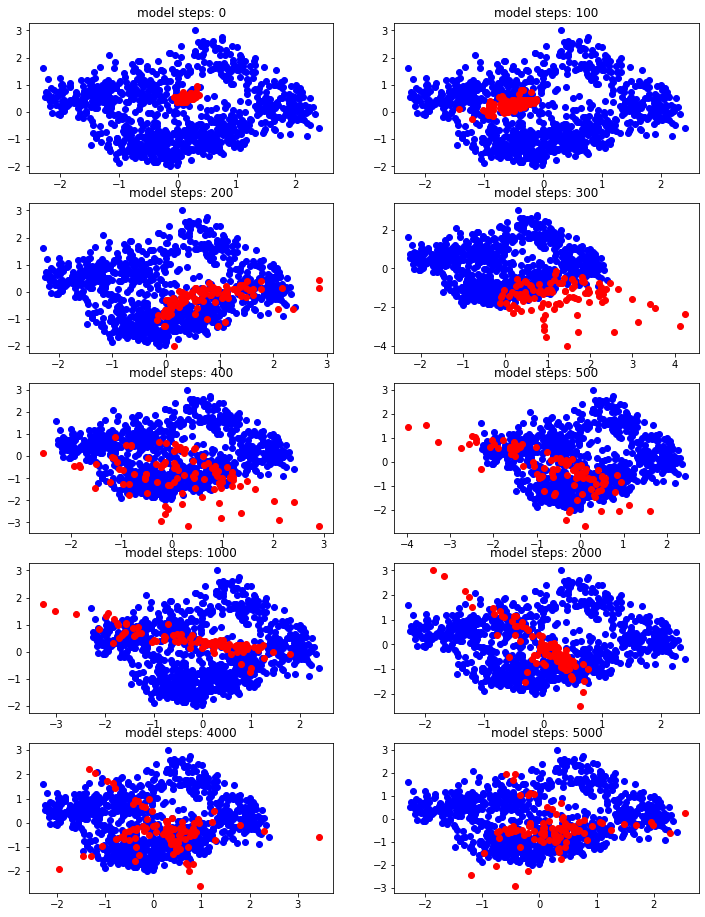

In [44]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + 'model_credit_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [45]:
A_columns = original_df.columns[original_df.dtypes == object][:-1]

In [46]:
A_columns

Index(['1', '3', '4', '6', '7', '9', '10', '12', '14', '15', '17', '19', '20'], dtype='object')

In [47]:
fooled_samples = scaler.inverse_transform(g_z)
generated_df = pd.DataFrame(fooled_samples)
# generated_df['20'] = g_z[:,-1]
generated_df.columns = original_df.columns
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df['21'] = generated_df['21'].apply(lambda v: 2 if v >= 1.5 else 1)
generated_df = generated_df.round()
generated_df[generated_df < 0] = 0
for a_column in A_columns:
    generated_df[a_column] = generated_df[a_column].apply(lambda v: f'A{int(v)}')
generated_df

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,discriminator
0,A10,2.0,A32,A0,0.0,A60,A73,2.0,A92,A101,...,29.0,A143,A151,0.0,A173,1.0,A191,A201,1,0
1,A14,12.0,A34,A57,2997.0,A61,A72,4.0,A92,A101,...,33.0,A143,A152,2.0,A174,1.0,A191,A201,1,0
2,A14,15.0,A33,A43,1423.0,A62,A72,4.0,A92,A101,...,29.0,A143,A152,2.0,A174,1.0,A191,A201,1,0
3,A15,30.0,A31,A0,9029.0,A66,A70,5.0,A92,A101,...,60.0,A140,A152,0.0,A175,1.0,A192,A201,2,0
4,A12,49.0,A32,A35,5725.0,A61,A73,2.0,A92,A101,...,25.0,A143,A152,1.0,A173,1.0,A191,A201,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A13,22.0,A32,A120,5354.0,A62,A73,3.0,A92,A101,...,40.0,A143,A152,2.0,A173,1.0,A191,A201,1,0
96,A12,3.0,A34,A51,2892.0,A61,A75,4.0,A93,A101,...,50.0,A143,A152,1.0,A174,1.0,A191,A201,1,0
97,A13,14.0,A31,A43,313.0,A64,A73,3.0,A92,A101,...,42.0,A143,A151,2.0,A173,1.0,A191,A201,1,0
98,A11,59.0,A33,A0,2634.0,A60,A72,2.0,A91,A100,...,27.0,A143,A152,2.0,A173,1.0,A191,A201,2,0


In [48]:
fooled_samples[:, -1]

array([0.9972884 , 1.1036994 , 0.91657656, 2.398571  , 2.0037591 ,
       0.96761787, 1.1849025 , 2.0767627 , 2.2057462 , 1.7448723 ,
       0.9929752 , 1.0330775 , 1.9695132 , 0.73573065, 1.2088625 ,
       1.1447054 , 1.1388941 , 1.0867697 , 0.8515784 , 1.1007622 ,
       1.1493331 , 0.9795338 , 1.5921302 , 0.7430677 , 1.0043758 ,
       2.142634  , 1.0089625 , 1.2313721 , 1.0425478 , 1.2953213 ,
       1.1885113 , 1.1628529 , 1.4944081 , 1.1383959 , 1.0739758 ,
       1.9322404 , 0.7595139 , 1.8031535 , 1.2664963 , 1.008532  ,
       1.2240725 , 0.77951485, 0.9978826 , 1.3386701 , 1.5069468 ,
       1.068377  , 1.2335142 , 1.2219783 , 0.90574324, 1.7311528 ,
       1.08615   , 1.7401042 , 1.0947185 , 0.8794163 , 1.0391932 ,
       1.3804973 , 1.491791  , 2.4694302 , 1.9103893 , 1.0156794 ,
       1.2602957 , 0.9905689 , 1.0613832 , 1.1423095 , 1.1794734 ,
       1.1458898 , 0.8722719 , 1.11407   , 1.1121522 , 1.0627618 ,
       2.251008  , 0.9805478 , 0.66510594, 0.9400073 , 1.16574

In [49]:
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,1
996,A11,30.0,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1.0,A192,A201,1
997,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,1
998,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,2


In [50]:
class_col = generated_df['21']
tmp = generated_df.drop(columns=['21' ,'discriminator'], axis=1)
tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
tmp = pd.concat([tmp, class_col],axis=1)
tmp

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.492115,-1.047006,-0.014234,-1.317293,-1.033400,-1.491882,0.004868,-0.593277,-0.205216,-1.388639,...,0.790713,-0.651927,1.258289,-1.031944,-1.601539,0.449818,-1.447016,-1.254428,-1.443080,1
1,1.044946,-0.768511,0.801654,-0.910576,-0.697683,-0.753026,-0.406497,0.821988,-0.391760,-0.739755,...,0.524973,-0.489268,0.754828,-0.052781,-0.025454,1.035284,-0.800731,-0.764657,-0.729128,1
2,0.993782,-0.675534,0.516685,-0.984868,-0.870911,-0.297371,-0.267702,0.674969,-0.302912,-0.952395,...,0.077281,-0.628332,0.743155,-0.219560,-0.311069,1.208543,-1.088363,-0.955732,-0.998256,1
3,1.888475,-0.227358,-0.684665,-1.760447,-0.033936,1.678417,-1.498227,1.797377,-0.606127,-1.400656,...,-1.495031,0.464804,-1.871013,0.186594,-1.594097,1.551496,-1.631741,1.930991,-1.644256,2
4,-0.254517,0.311691,-0.050163,-1.027034,-0.397460,-0.834885,-0.061500,-0.435160,-0.343632,-1.012892,...,-0.935630,-0.772331,0.885628,-0.016878,-0.963484,0.298615,-0.867276,-0.965750,-0.902604,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.088181,-0.460750,0.031175,-0.570040,-0.438297,-0.288746,0.106788,0.269245,-0.054053,-0.523960,...,-0.132257,-0.233995,0.586403,-0.328353,-0.326638,0.382186,-0.536299,-0.433506,-0.491003,1
96,-0.049842,-1.029881,0.978476,-0.938024,-0.709277,-1.101843,0.842165,0.715428,0.460151,-1.131200,...,-0.530132,0.103257,1.219693,0.167257,-0.775122,0.840502,-1.415060,-0.655670,-1.137928,1
97,0.537452,-0.705860,-0.254127,-0.984570,-0.993063,0.251241,0.095364,0.379630,-0.309367,-0.974956,...,-0.616703,-0.185141,1.133051,-0.973975,-0.443618,0.540868,-1.139756,-1.041456,-0.990585,1
98,-0.980371,0.609280,0.653212,-1.479813,-0.737594,-1.375898,-0.673072,-0.299958,-1.246735,-1.513834,...,-0.557287,-0.701401,1.164355,0.149936,-0.332065,0.107276,-1.274977,-1.129652,-1.461446,2


In [51]:
original_df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,1
996,A11,30.0,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1.0,A192,A201,1
997,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,1
998,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,2


In [52]:
pca = PCA(n_components=2, svd_solver='full')
original_emb = pca.fit_transform(df)
generated_positive_emb = pca.transform(tmp[tmp['21'].eq(2)])
generated_negative_emb = pca.transform(tmp[tmp['21'].eq(1)])
original_positive_emb = original_emb[original_df[original_df['21'].eq('2')].index.values]
original_negative_emb = original_emb[original_df[original_df['21'].eq('1')].index.values]
failed = pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])

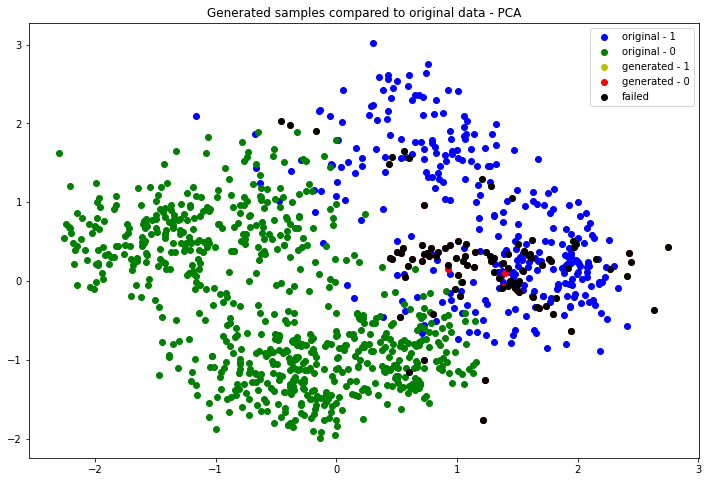

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Generated samples compared to original data - PCA')
ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')

ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
plt.legend()
plt.show()

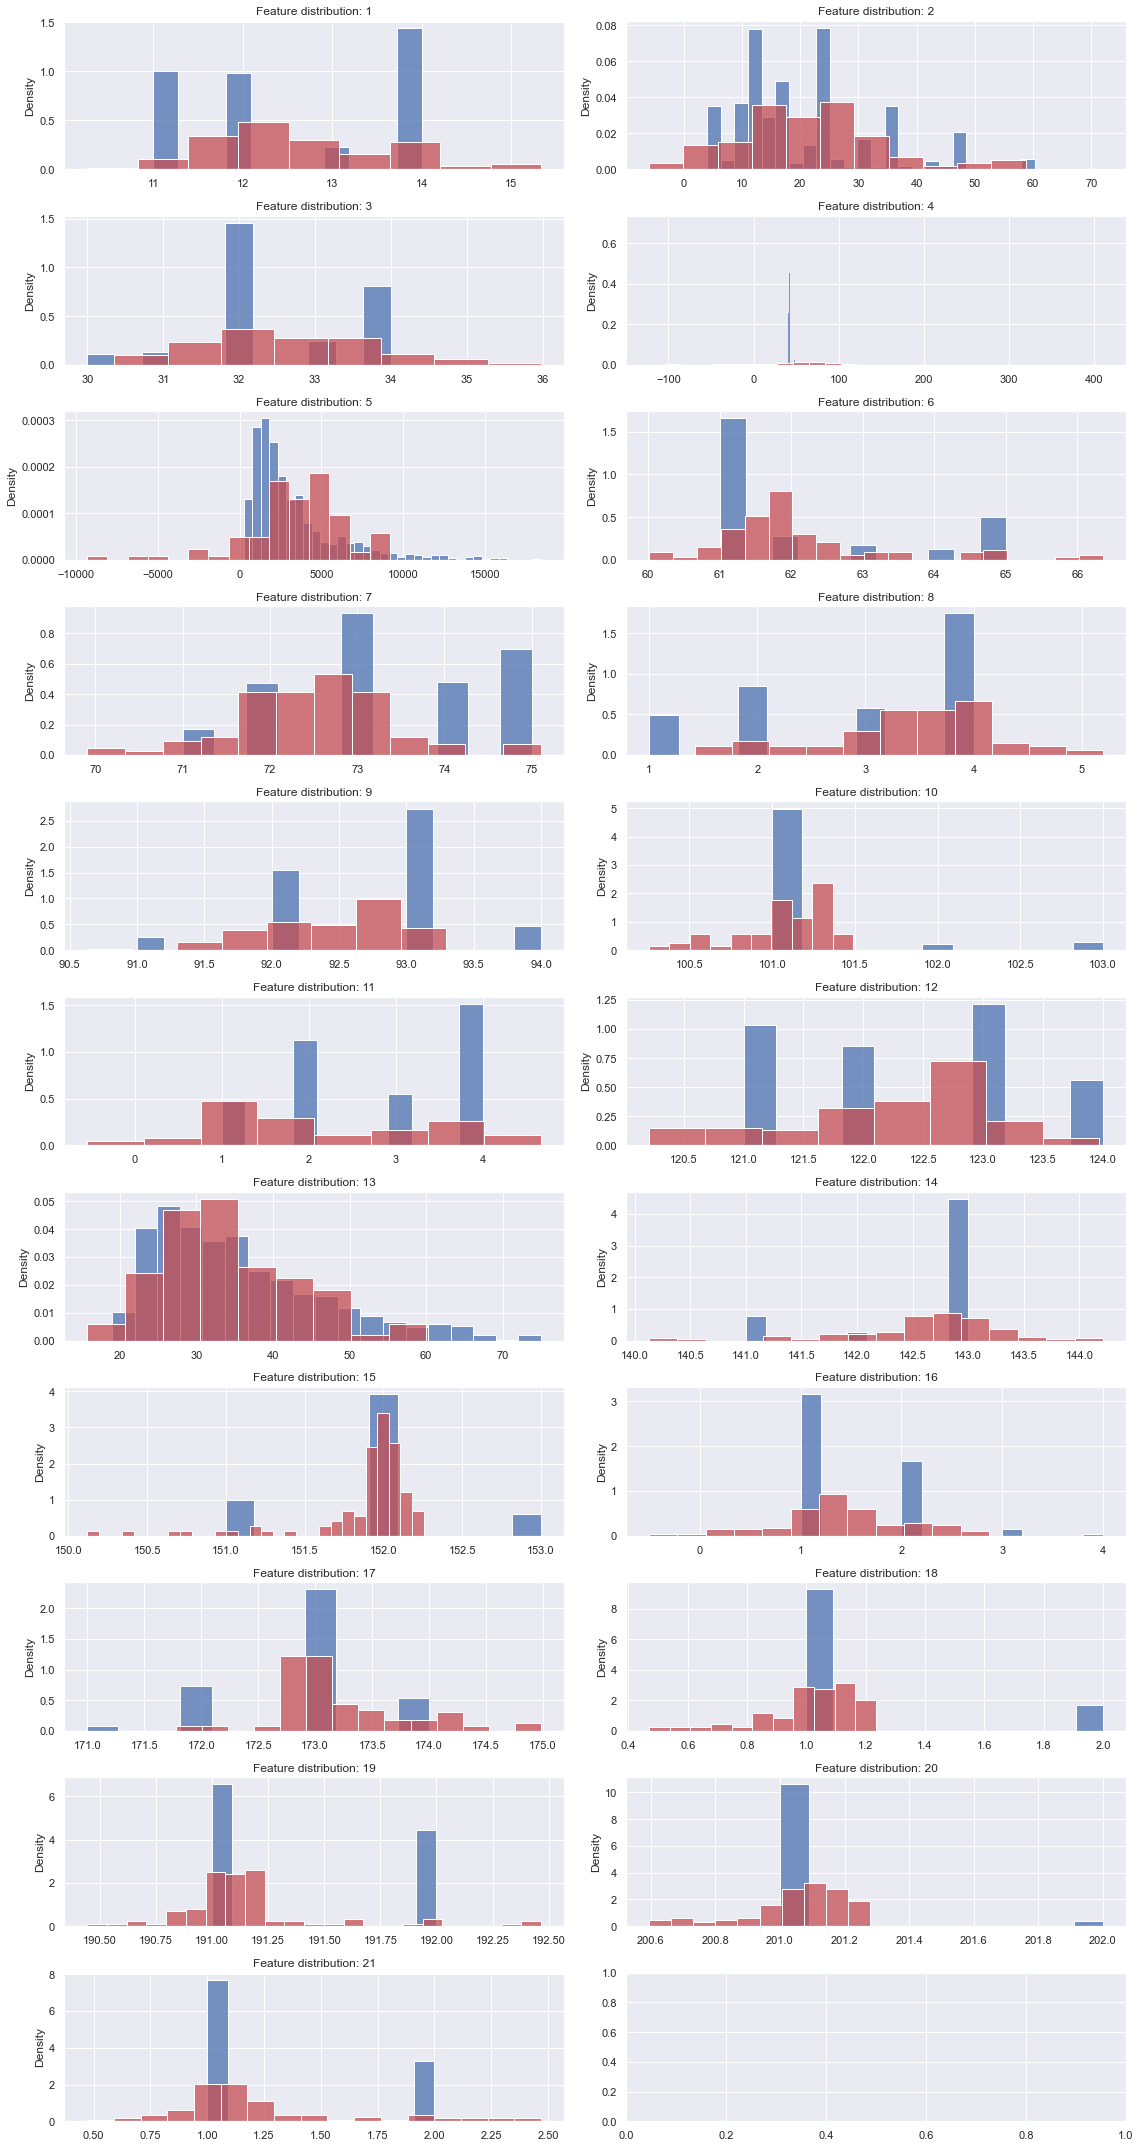

In [87]:
import seaborn as sns, numpy as np

sns.set_theme(); np.random.seed(0)

def plot_feature_dist(df, gen):
    fig, ax = plt.subplots(int(np.ceil(df.shape[1]/2)), 2, figsize=(16, 30))
    for column in range(df.shape[1]):
        ax[column // 2, column % 2].set_title(f'Feature distribution: {column + 1}')
        sns.histplot(df[:, column], label='Original', stat='density', ax=ax[column // 2, column % 2], color='b')
        sns.histplot(gen[:, column], label='Generated', stat='density', ax=ax[column // 2, column % 2], color='r')
    fig.tight_layout()
    plt.savefig('german_credit.png')
plot_feature_dist(scaler.inverse_transform(df.values), scaler.inverse_transform(g_z))

# PART 2

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.30, random_state=42)
print(f'train shape: {X_train.shape}')
print(f'test shape: {X_test.shape}')

train shape: (700, 20)
test shape: (300, 20)


In [12]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train.values, y_train.values)

RandomForestClassifier(max_depth=3, random_state=0)

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


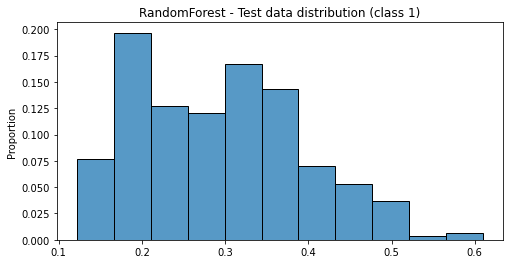

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))
confidence_score = clf.predict_proba(X_test)[:, 1]
sns.histplot(confidence_score, stat='proportion')
ax.set_title('RandomForest - Test data distribution (class 1)')
plt.show()

In [18]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model_german'
C = 0.7

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim, C]
train_args = ['', epochs, log_step]

model = GAN_RF

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)

In [19]:
history = synthesizer.train(df, train_args)

0 [D loss: 0.708428, acc.: 42.19%] [G loss: 0.739104]
100 [D loss: 0.693092, acc.: 51.56%] [G loss: 0.755110]
200 [D loss: 0.571596, acc.: 78.12%] [G loss: 0.751985]
300 [D loss: 0.623781, acc.: 67.19%] [G loss: 0.818185]
400 [D loss: 0.649360, acc.: 67.19%] [G loss: 0.810720]
500 [D loss: 0.666113, acc.: 60.94%] [G loss: 0.887732]
600 [D loss: 0.571792, acc.: 78.12%] [G loss: 0.936196]
700 [D loss: 0.622774, acc.: 67.19%] [G loss: 1.036445]
800 [D loss: 0.609864, acc.: 68.75%] [G loss: 0.787720]
900 [D loss: 0.592077, acc.: 70.31%] [G loss: 1.046261]
1000 [D loss: 0.651477, acc.: 62.50%] [G loss: 0.863933]
1100 [D loss: 0.615251, acc.: 67.19%] [G loss: 0.794501]
1200 [D loss: 0.577660, acc.: 64.06%] [G loss: 1.006629]
1300 [D loss: 0.590743, acc.: 68.75%] [G loss: 0.915717]
1400 [D loss: 0.589976, acc.: 73.44%] [G loss: 0.853744]
1500 [D loss: 0.505326, acc.: 87.50%] [G loss: 0.880750]
1600 [D loss: 0.505428, acc.: 79.69%] [G loss: 1.128734]
1700 [D loss: 0.596768, acc.: 65.62%] [G lo

In [20]:
from sklearn.decomposition import PCA

In [21]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [22]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 1000 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [23]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

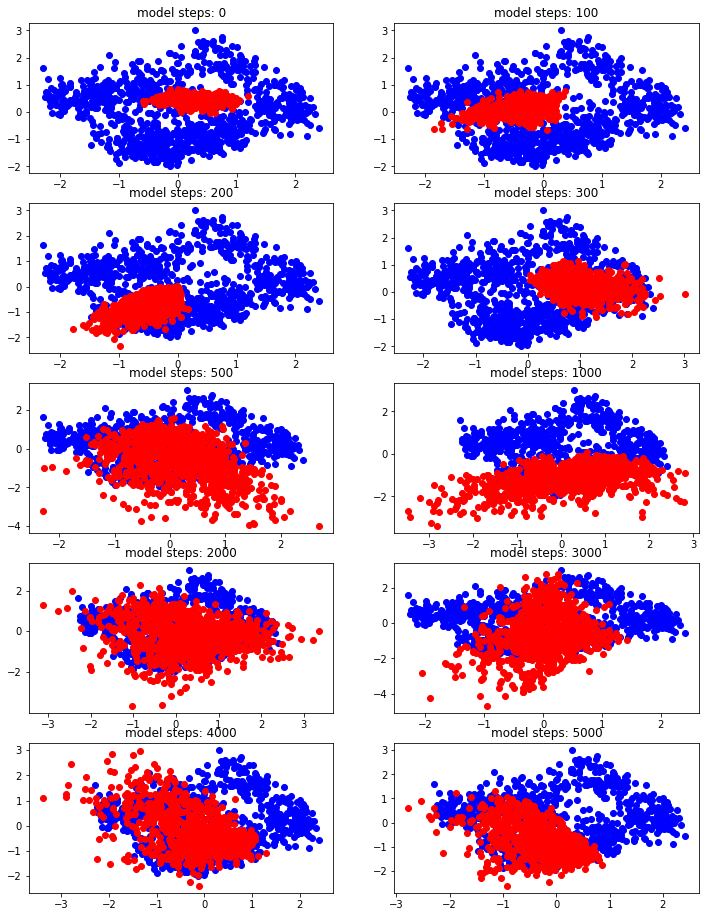

In [25]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict([z, np.random.uniform(0, 1, test_size)])
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


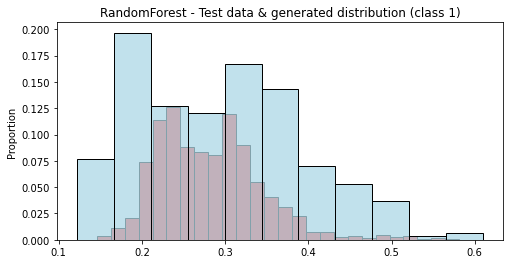

In [26]:
g_z__confidence_score_1 = clf.predict_proba(g_z[:, :-1])[:, 1]
confidence_score_1 = clf.predict_proba(X_test)[:, 1]


fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(g_z__confidence_score_1, stat='proportion', color='red')
sns.histplot(confidence_score_1, stat='proportion', color='lightblue')
ax.set_title('RandomForest - Test data & generated distribution (class 1)')
plt.show()

C:\Users\amits\Anaconda3\envs\home\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


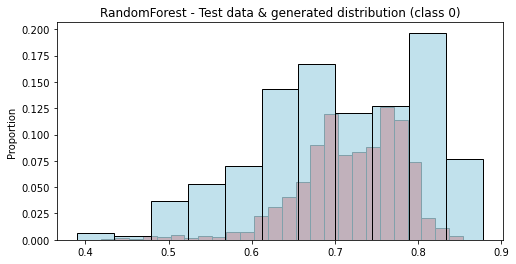

In [27]:
g_z__confidence_score_0 = clf.predict_proba(g_z[:, :-1])[:, 0]
confidence_score_0 = clf.predict_proba(X_test)[:, 0]

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(g_z__confidence_score_0, stat='proportion', color='red')
sns.histplot(confidence_score_0, stat='proportion', color='lightblue')
ax.set_title('RandomForest - Test data & generated distribution (class 0)')
plt.show()

In [28]:
import numpy as np

In [29]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1.000000,-0.941176,1.0,-0.983784,-0.898867,1.0,1.0,1.000000,0.333333,-1.0,...,-1.000000,0.714286,1.0,0.0,-0.333333,0.333333,-1.0,1.0,-1.0,-1.0
1,-0.333333,0.294118,0.0,-0.983784,-0.372620,-1.0,0.0,-0.333333,-0.333333,-1.0,...,-1.000000,-0.892857,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,1.0
2,1.000000,-0.764706,1.0,-0.967568,-0.796853,-1.0,0.5,-0.333333,0.333333,-1.0,...,-1.000000,0.071429,1.0,0.0,-1.000000,-0.333333,1.0,-1.0,-1.0,-1.0
3,-1.000000,0.117647,0.0,-0.989189,-0.160119,-1.0,0.5,-0.333333,0.333333,1.0,...,-0.333333,-0.071429,1.0,1.0,-1.000000,0.333333,1.0,-1.0,-1.0,-1.0
4,-1.000000,-0.411765,0.5,-1.000000,-0.491581,-1.0,0.0,0.333333,0.333333,-1.0,...,1.000000,0.214286,1.0,1.0,-0.333333,0.333333,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,-0.764706,0.0,-0.989189,-0.836470,-1.0,0.5,0.333333,-0.333333,-1.0,...,-1.000000,-0.571429,1.0,0.0,-1.000000,-0.333333,-1.0,-1.0,-1.0,-1.0
996,-1.000000,-0.235294,0.0,-0.994595,-0.603059,-1.0,0.0,1.000000,-1.000000,-1.0,...,-0.333333,-0.250000,1.0,0.0,-1.000000,1.000000,-1.0,1.0,-1.0,-1.0
997,1.000000,-0.764706,0.0,-0.983784,-0.939034,-1.0,1.0,1.000000,0.333333,-1.0,...,0.333333,-0.321429,1.0,0.0,-1.000000,0.333333,-1.0,-1.0,-1.0,-1.0
998,-1.000000,0.205882,0.0,-0.983784,-0.824475,-1.0,0.0,1.000000,0.333333,-1.0,...,1.000000,-0.857143,1.0,1.0,-1.000000,0.333333,-1.0,1.0,-1.0,1.0


In [30]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded_1 = scalar.transform(df[df['class'].eq(1)].values)
X_embedded_2 = scalar.transform(df[df['class'].eq(0)].values)

KeyError: 'class'

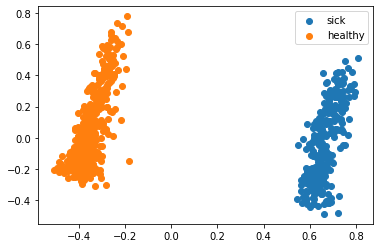

In [57]:
plt.scatter(X_embedded_1[:, 0], X_embedded_1[:, 1], label='sick')
plt.scatter(X_embedded_2[:, 0], X_embedded_2[:, 1], label='healthy')


plt.legend()
plt.show()

In [32]:
df['21'].value_counts()

-1.0    700
 1.0    300
Name: 21, dtype: int64